In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

Numerical Integration 1: plot the graph for given data and find the area using a suitable method.

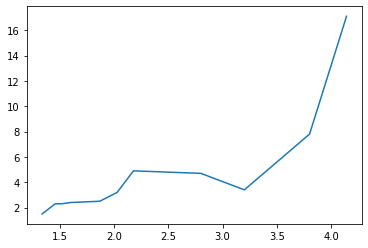

In [2]:
x=[1.34, 1.46, 1.52, 1.6, 1.87, 2.03, 2.18, 2.8, 3.2, 3.8, 4.14]
f=[1.5, 2.3, 2.3, 2.4, 2.5, 3.2, 4.9, 4.7, 3.4, 7.8, 17.1]
plt.plot(x, f)

In [3]:
#Using Trapizoidal rule
def area(x1, x2, f1, f2):
    A=0.5 * (x2 - x1)* (np.abs(f2+f1))  # Area finding
    return(A)

In [4]:
y=len(x)
Area=[]
for i in range (y-1):
    A=area(x[i], x[i+1], f[i], f[i+1])
    Area.append(A)
#print(Area)
integral =0.0
for i in Area:
    integral=integral + i
print(integral, " is the integration value")
    

14.467999999999996  is the integration value


Write a function in python trap (f, a, b, N) which
will evaluate the integral ∫ f(x)dx 
using the trapezoidal rule with N steps.
Also develop a similar function simp (f, a, b, N) for the Simpson’s rule. Use
these functions to evaluate the numerical integrals in the subsequent problems,
wherever applicable.

In [5]:
def function1(x):
    y=x**2
    return(y)

def function2(x):
    return(np.sin(x))

def function3(x):
    y=np.sin(x)/x
    return(y**2)

def trap(function,a, b, N):
    x=np.linspace(a, b, N)
    A=[]
    y = function(x)
    a=len(x) 
    
    for i in range(a-1):
        A.append(area(x[i], x[i+1], y[i], y[i+1]))
        
    integral=0
    
    for i in A:
        integral=integral + i
        
    return(integral)

def simp(function, a, b, N):
    x=np.linspace(a, b, N)
    A=[]
    y = function(x)
    a=len(x)
    
    for i in range(a-1):
        y=(x[i+1]-x[i]) * (function(x[i])+4*function((x[i]+x[i+1])/2)+function(x[i+1]))
        A.append(y/6)
    
    integral=0
    
    for i in A:
        integral=integral + i
        
    return(integral)
        
    
    

In [6]:
trap(function1,-1,1,2**10)

0.6666679407195909

In [7]:
simp(function1,-1, 1, 2**10)

0.6666666666666675

In [8]:
trap(function2, 0, m.pi, 2**10 )

1.9999984281999592

In [9]:
simp(function2, 0, m.pi, 2**10)

2.0000000000000613

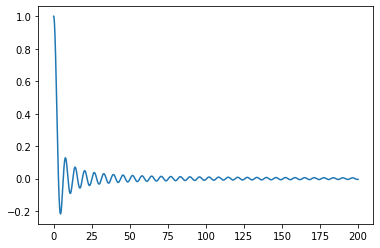

In [10]:
x=np.linspace(0.00001,200,10000)
y=np.sin(x)
plt.plot(x, (y/x))

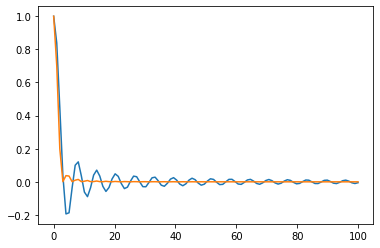

In [11]:
x=np.linspace(0.00001, 100, 100)
y=np.sin(x)
plt.plot(x, y/x)
plt.plot(x, (y/x)**2)

In [12]:
trap(function3, 0.0000000001, 100, 2**10)

1.5658182076234524

In [13]:
simp(function3, 0.0000000001, 100, 2**10)

1.5658182776254017

Show plot of log e(N) with varying log N for all
the integrals.

In [14]:
def error_trep(a, b, function, val):
    errors=[]
    x=[]
    for i in range (1,10):
        errors.append(np.abs(val - trap(function, a, b, 2**i))/val)
        x.append(i)
    plt.plot(x,errors)
    plt.xscale('log')

def error_simp(a,b,function,val):
    errors=[]
    x=[]
    for i in range (1,10):
        errors.append(np.abs(val - simp(function, a, b, 2**i))/val)
        x.append(i)
    plt.plot(x,errors)
    plt.xscale('log')


Function 1: x^2

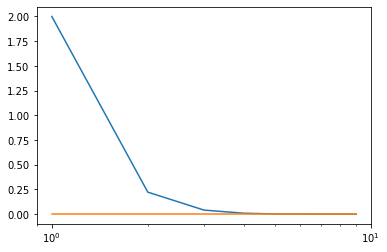

In [15]:
error_trep(-1, 1, function1, 2/3)
error_simp(-1, 1, function1, 2/3)

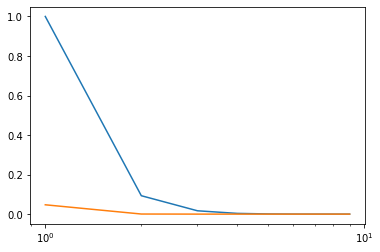

In [16]:
error_trep( 0, m.pi, function2, 2)
error_simp(0, m.pi, function2, 2)

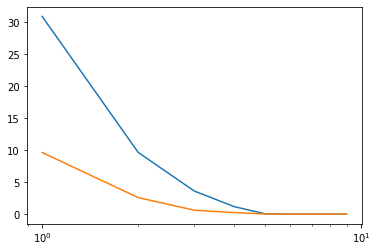

In [17]:
error_trep(0.0000000001, 100, function3, 1.57)
error_simp(0.0000000001, 100, function3, 1.57)

Numerically calculate the time period of oscillation by integrating the
equation with Trapezoidal method and check this against the expected value.

Note that the integrand will diverge at the limits. So the limits has to be
redefined i.e. b(1-e) in place of b. Numerically obtained values of T will also
diverge for very low values of e. Make a log-log plot of e vs. T. Then choose a
suitable value of e that will provide a reasonably accurate value of T. Verify that
T does not depend on the amplitude of oscillation.

In [18]:
def Timeperiod_1(a,b,e,N,E): 
    def fun1(x):
        y=2*((m.pi)**2 )*(x**2)
        z=y/E
        w=1/(1-z)
        return(w**(1/2))
    
    area=trap(fun1, a+e, b-e, N)
    con=(2/E)**(1/2)
    return (con*area)

def fun2(x):
        y=m.exp(x**2/25) - 1
        z=y*(25*2*(m.pi)**2)
        return(z)

def Timeperiod_2(a,b,e,N,E):
    def fun2(x):
        y=m.exp(x**2/25) - 1
        z=y*(25*2*(m.pi)**2)
        return(z)
    integral=[]
    x=np.linspace(a, b, N)
    A=[]
    for i in x:
        A.append(fun2(i))
    a=len(x)
    for i in range(a-1):
        integral.append(area(x[i], x[i+1], A[i], A[i+1]))
        
    j=0
    for i in integral:
        j=j + i
        
    con=(2/E)**(1/2)
    return (con*j)

In [19]:
Timeperiod_1(-2, 2, 0.0001, 10**6, 8*(m.pi)**2 )

0.9936339879121445

In [20]:
Timeperiod_1(-4, 4, 0.0001, 10**6, 32*(m.pi)**2)

0.995499008979651

In [21]:
Timeperiod_1(-8, 8, 0.0001, 10**6, 128*(m.pi)**2)

0.9968185927401884

In [22]:
epsilon=[0.0000001,0.000001,0.00001,0.0001,0.001,0.01]
x=[]
for i in epsilon:
    x.append(Timeperiod_1(-2,2,i,10**6, 8*(m.pi)**2))
x  


[1.0010628874683594,
 0.9995161458274536,
 0.9979934776313907,
 0.9936339879121445,
 0.9798674829466673,
 0.9363114672632058]

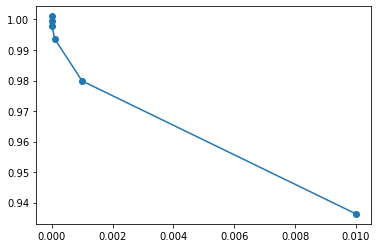

In [23]:
plt.plot(epsilon,x, marker ='o')

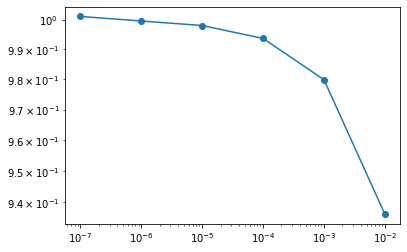

In [24]:
plt.plot(epsilon,x, marker ='o')
plt.xscale('log')
plt.yscale('log')

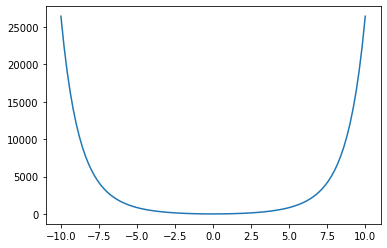

In [25]:
#plotting V(x)
x=np.linspace(-10,10,100)
A=[]
for i in x:
    A.append(fun2(i))

plt.plot(x,A)

In [26]:
Timeperiod_2(-10, 10, 0.0001, 10**6, 200*(m.pi)**2)

2270.2134607049657

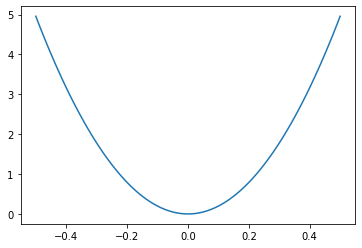

In [27]:
x=np.linspace(-0.5,0.5,100)
A=[]
for i in x:
    A.append(fun2(i))

plt.plot(x,A)   

In [28]:
Timeperiod_2(-0.5,0.5,0.001, 10**6, 4.934 )


1.0504320208919213

In [29]:
Timeperiod_2(-0.48, 0.48, 0.0001, 10**6,((0.48*(m.pi))**2)*2)

0.9677714296205921

In [30]:
Timeperiod_2(-0.46, 0.46, 0.0001, 10**6,((0.46*(m.pi))**2)*2)

0.8886031651944529

In [31]:
Timeperiod_2(-0.45, 0.45, 0.0001, 10**6,((0.45*(m.pi))**2)*2)

0.8502951968495627

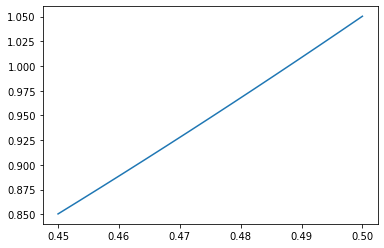

In [32]:
x=np.linspace(0.45, 0.5, 15)
A=[]
for i in x:
    A.append(Timeperiod_2(-i, i, 0.0001, 10**6,((i*(m.pi))**2)*2))
    
plt.plot(x,A)

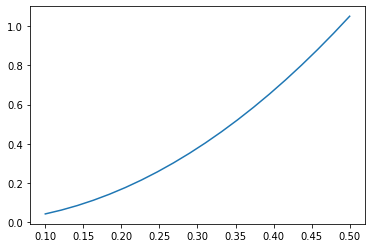

In [33]:
x=np.linspace(0.1, 0.5, 20)
A=[]
for i in x:
    A.append(Timeperiod_2(-i, i, 0.0001, 10**6,(((m.pi * i))**2)*2))
    
plt.plot(x,A)

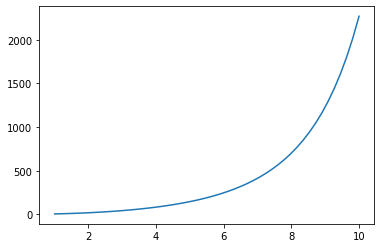

In [34]:
x=np.linspace(1, 10, 50)
A=[]
for i in x:
    A.append(Timeperiod_2(-i, i, 0.0001, 10**6,(((m.pi * i))**2)*2))
    
plt.plot(x,A)